In [1]:
%matplotlib notebook

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
dataset = pd.read_csv("../datasets/arrhythmia/arrhythmia.data", header=None, na_values="?")

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [4]:
dataset[0].max()

83

In [5]:
arr = dataset[279].unique()
arr.sort()
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16], dtype=int64)

<IPython.core.display.Javascript object>


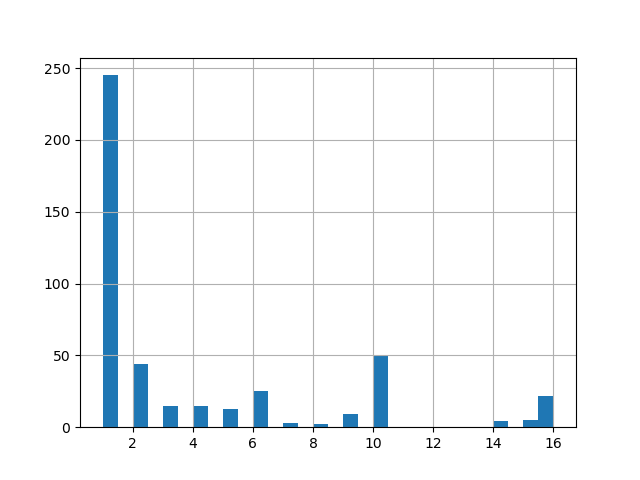

In [6]:
dataset[279].hist(bins = 30)
plt.show()

In [7]:
dataset[13]

0        NaN
1        NaN
2       23.0
3        NaN
4        NaN
       ...  
447      NaN
448      NaN
449     84.0
450    103.0
451      NaN
Name: 13, Length: 452, dtype: float64

In [8]:
X_data_raw = dataset.drop(279, axis=1)
y_data = dataset[279].copy()

In [9]:
X_data_raw

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


In [10]:
y_data

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: 279, Length: 452, dtype: int64

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)
X_prep_std

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,1.734439,-1.107520,0.641327,0.713814,0.135505,0.844945,0.113709,0.113809,1.201469,-1.094661,...,0.004037,0.508843,-0.013839,0.278621,-0.079546,0.0,1.109553,1.177737,0.294603,1.078670
1,0.579312,0.902918,-0.031998,-0.251644,-0.516072,0.420769,1.013301,-0.588564,-1.977064,-0.191203,...,-0.327703,0.508843,-0.157972,0.728573,-0.079546,0.0,-0.906889,0.616126,0.079613,0.504874
2,0.457720,-1.107520,0.156533,1.618932,3.197915,0.175193,0.563505,0.422853,0.464980,1.373324,...,1.994474,0.508843,0.130294,-0.471299,-0.079546,0.0,-0.618826,1.528744,-0.520878,1.057018
3,0.518516,-1.107520,0.237332,1.558590,0.721924,1.045871,0.383587,0.254284,2.054247,-0.125096,...,0.667516,0.508843,0.908612,-0.371310,-0.079546,0.0,-0.330763,0.967133,1.132324,1.739077
4,1.734439,-1.107520,0.641327,0.713814,-0.059968,0.577044,-0.216141,0.198094,0.503742,-1.094661,...,-0.161833,0.508843,1.168051,-1.071235,-0.079546,0.0,-1.771079,1.879751,0.450286,1.804035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.396924,0.902918,-0.166663,0.110403,-0.581229,0.978896,0.443560,-0.448089,1.046419,-1.557409,...,0.501646,0.508843,-1.368689,-1.771161,-0.079546,0.0,0.533427,-0.436895,-1.758926,-1.622502
448,-0.575815,-1.107520,0.641327,1.015520,0.721924,-0.405260,-0.186154,0.872372,-0.659136,1.152968,...,-0.327703,0.508843,1.888716,-0.071342,-0.079546,0.0,-0.330763,0.826730,1.384382,1.782383
449,-0.636611,-1.107520,-0.005065,-0.010279,1.243185,0.465419,-0.066209,0.675708,1.007656,-2.615116,...,2.492083,0.508843,2.090502,-13.569901,-0.079546,0.0,2.837932,-0.156089,-4.709483,-3.392610
450,-0.879796,0.902918,-0.301328,-0.794714,0.265820,-1.097337,0.563505,1.349985,-1.046762,0.447829,...,0.833385,-0.220727,0.850959,0.378610,-0.079546,0.0,-0.042700,0.826730,0.420632,0.927101


In [12]:
import elpigraph
from elpigraph import computeElasticPrincipalTree
from elpigraph.plot import ModifiedPlotPG

#generate data : np.array (n_points x n_dim).
X_data = X_prep.values

In [13]:
tree_60 = computeElasticPrincipalTree(X_data, 60)[0]

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
279 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  60  nodes on  452  points and  279  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|0|0|0|3|2|12||60	2.4159	60	59	7	12	0	0	2.2219	2.2161	0.4396	0.441	0.1914	0.0026	0.1534	9.2042	0


41.5974  seconds elapsed


In [14]:
X_data_0 = (X_prep[0].values) * 83
X_data_0

array([75., 56., 54., 55., 75., 13., 40., 49., 44., 50., 62., 45., 54.,
       30., 44., 47., 47., 46., 73., 57., 28., 45., 36., 57., 40., 44.,
       34., 31., 56., 51., 53., 58., 50., 52., 69., 44., 50., 35., 62.,
       45., 43., 40., 30., 34., 40., 75., 69., 30., 41., 34., 75., 28.,
       39., 24., 52., 72., 38., 42., 46., 32.,  1., 35., 36., 27., 48.,
       44., 54., 26., 45., 64., 37., 37., 31., 46., 35., 34., 45., 37.,
       56., 71., 37., 57., 79., 51., 63., 75., 19., 40., 68., 73., 52.,
       64., 63., 62., 25., 55., 33., 37., 52., 36., 51., 39., 19., 27.,
       36., 63., 46., 57., 17., 50., 71., 43., 33.,  9., 29., 39., 74.,
       28., 24., 58., 69., 50., 72., 71., 37., 25., 58., 61., 53., 46.,
       56., 48., 39., 46., 41., 40., 47., 47., 35., 51., 35.,  1., 49.,
       31., 34., 36., 18., 34., 39., 17., 48., 32., 36., 34., 27., 45.,
       45., 60., 59., 46., 42., 42., 54., 24., 40., 25., 68., 19., 73.,
       40., 44., 50., 32., 56., 55., 54., 64., 27., 66., 56., 63

In [15]:
X_data_std = X_prep_std.values

In [16]:
tree_60_std = elpigraph.computeElasticPrincipalTree(X_data_std, 60)[0]

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
279 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  60  nodes on  452  points and  279  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|0|0|0|0|0|1|1|3|7||60	182.7751	60	59	14	7	0	0	170.7355	170.4344	0.3498	0.3509	11.8002	0.2393	14.3603	861.6168	0


42.1892  seconds elapsed


<IPython.core.display.Javascript object>


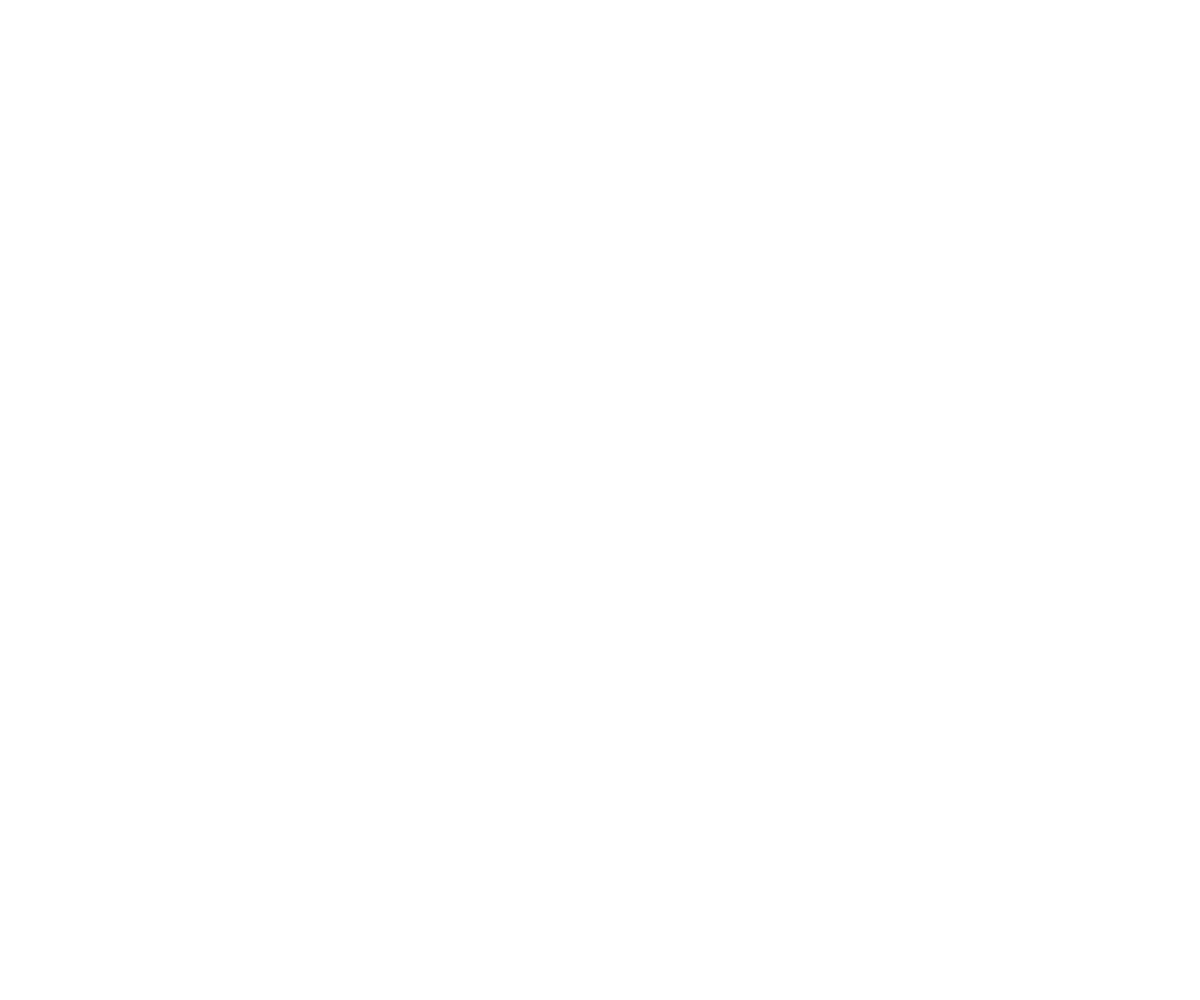

In [17]:
ModifiedPlotPG(X_data, tree_60, X_color=y_data, X_alpha = 0.75)

<IPython.core.display.Javascript object>


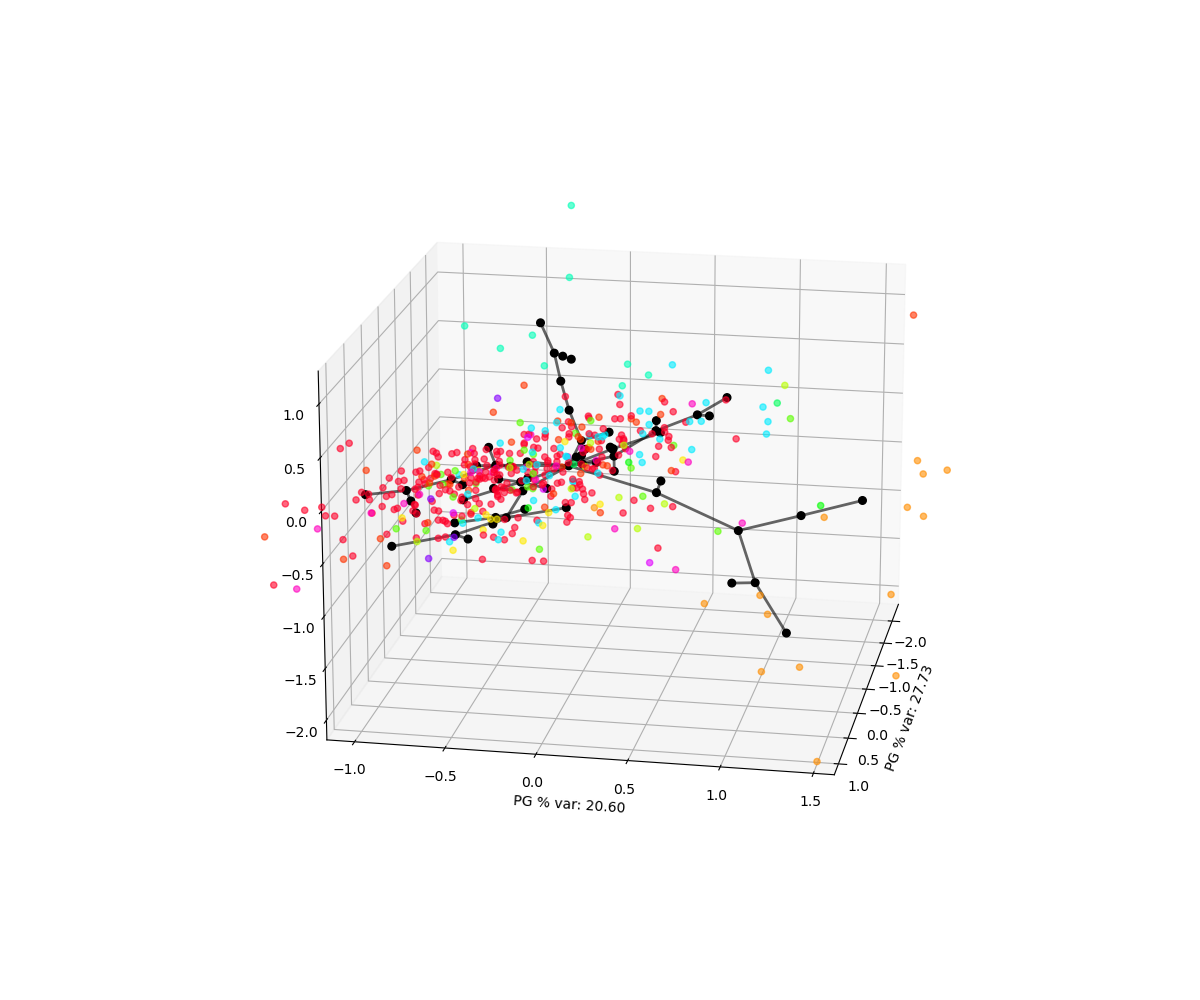

In [18]:
ModifiedPlotPG(X_data, tree_60, label_data=None, X_color=y_data, X_alpha=0.6, node_size=30, node_alpha=1, DimToPlot=[0, 1, 2])

<IPython.core.display.Javascript object>


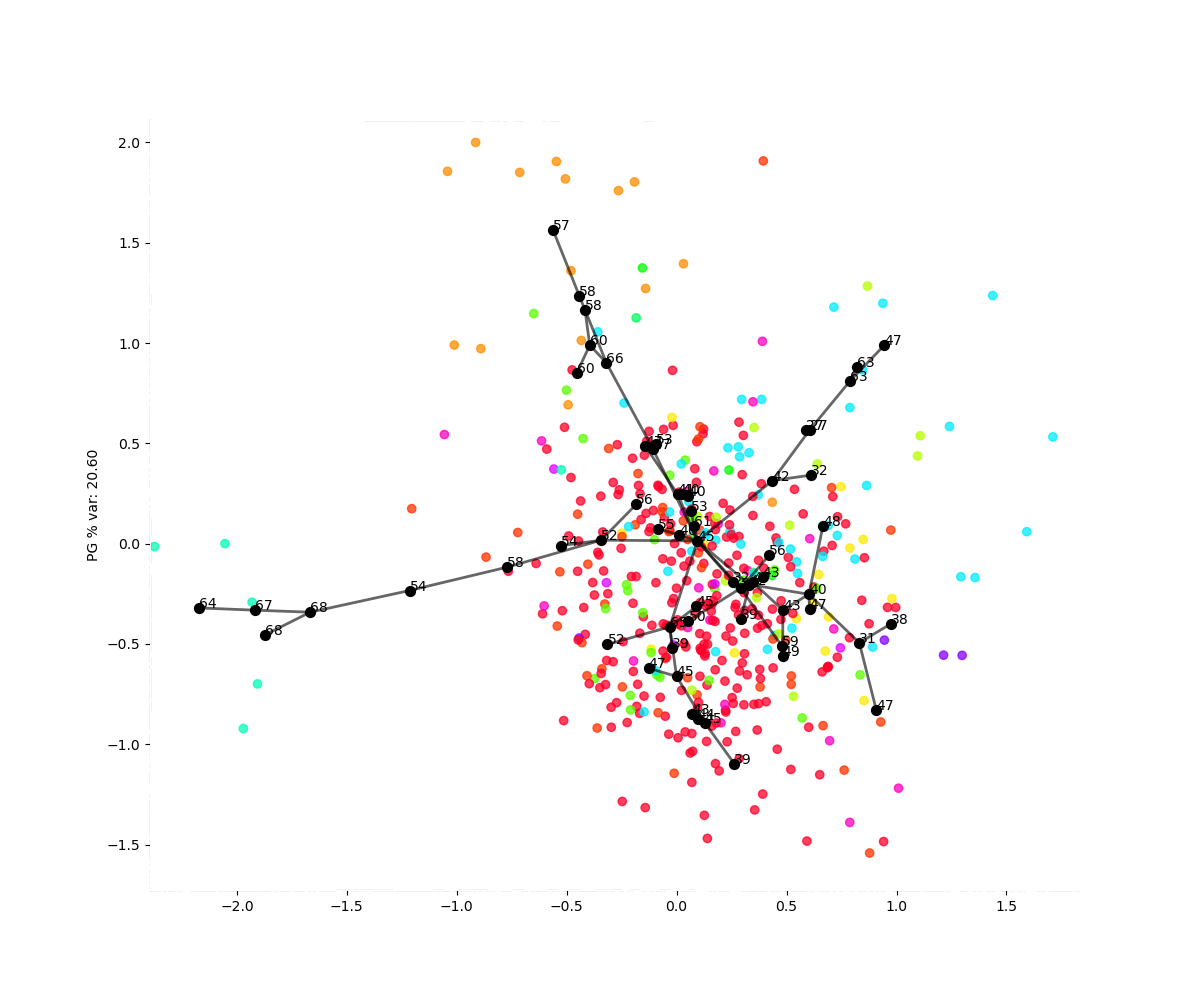

In [19]:
ModifiedPlotPG(X_data, tree_60, label_data=X_data_0, X_color=y_data, X_alpha = 0.75)

<IPython.core.display.Javascript object>


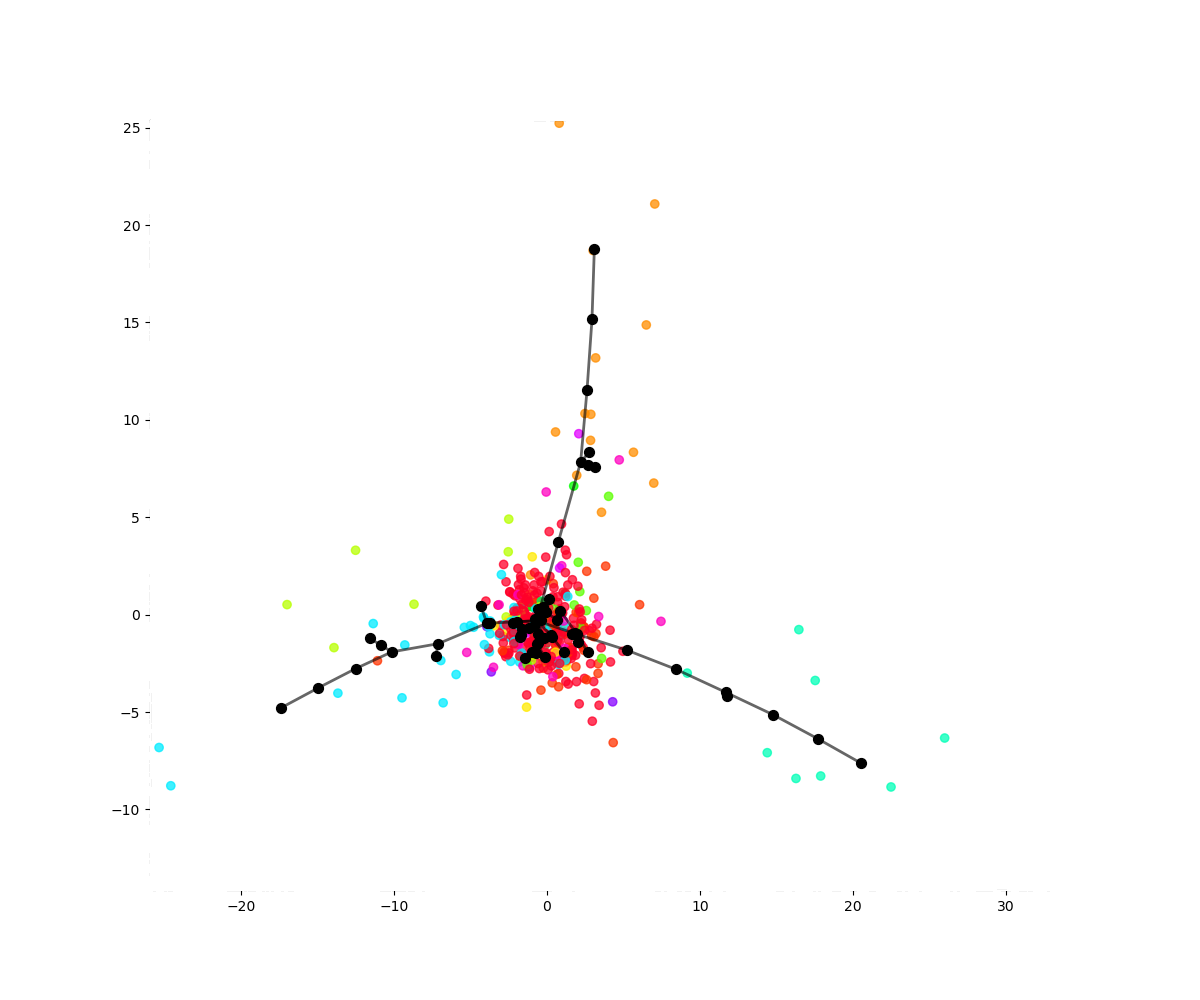

In [20]:
ModifiedPlotPG(X_data_std, tree_60_std, X_color=y_data, X_alpha = 0.75)

<IPython.core.display.Javascript object>


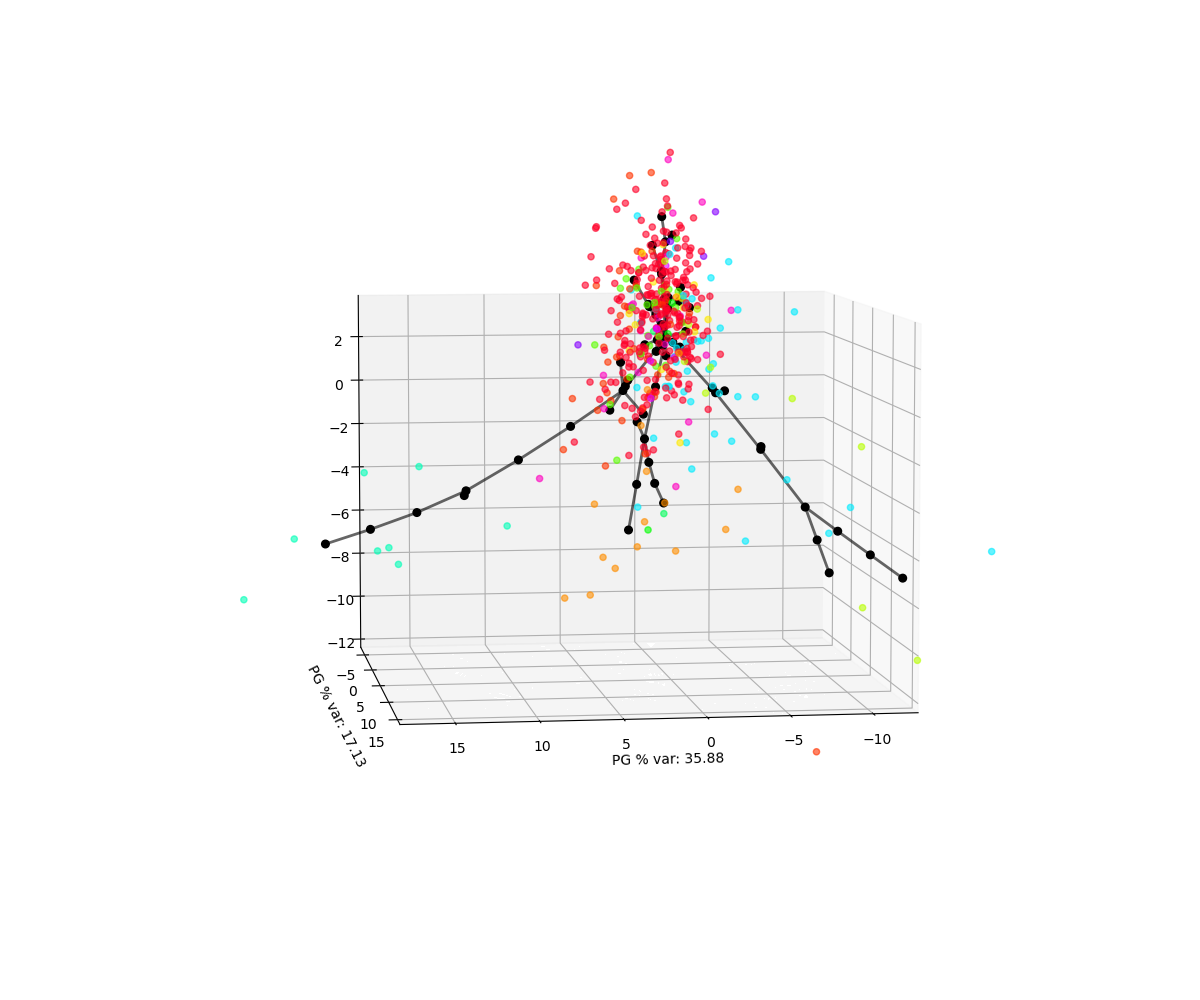

In [21]:
ModifiedPlotPG(X_data_std, tree_60_std, label_data=X_data_0, X_color=y_data, X_alpha=0.6, node_size=30, node_alpha=1, DimToPlot=[0, 1, 2])

<IPython.core.display.Javascript object>


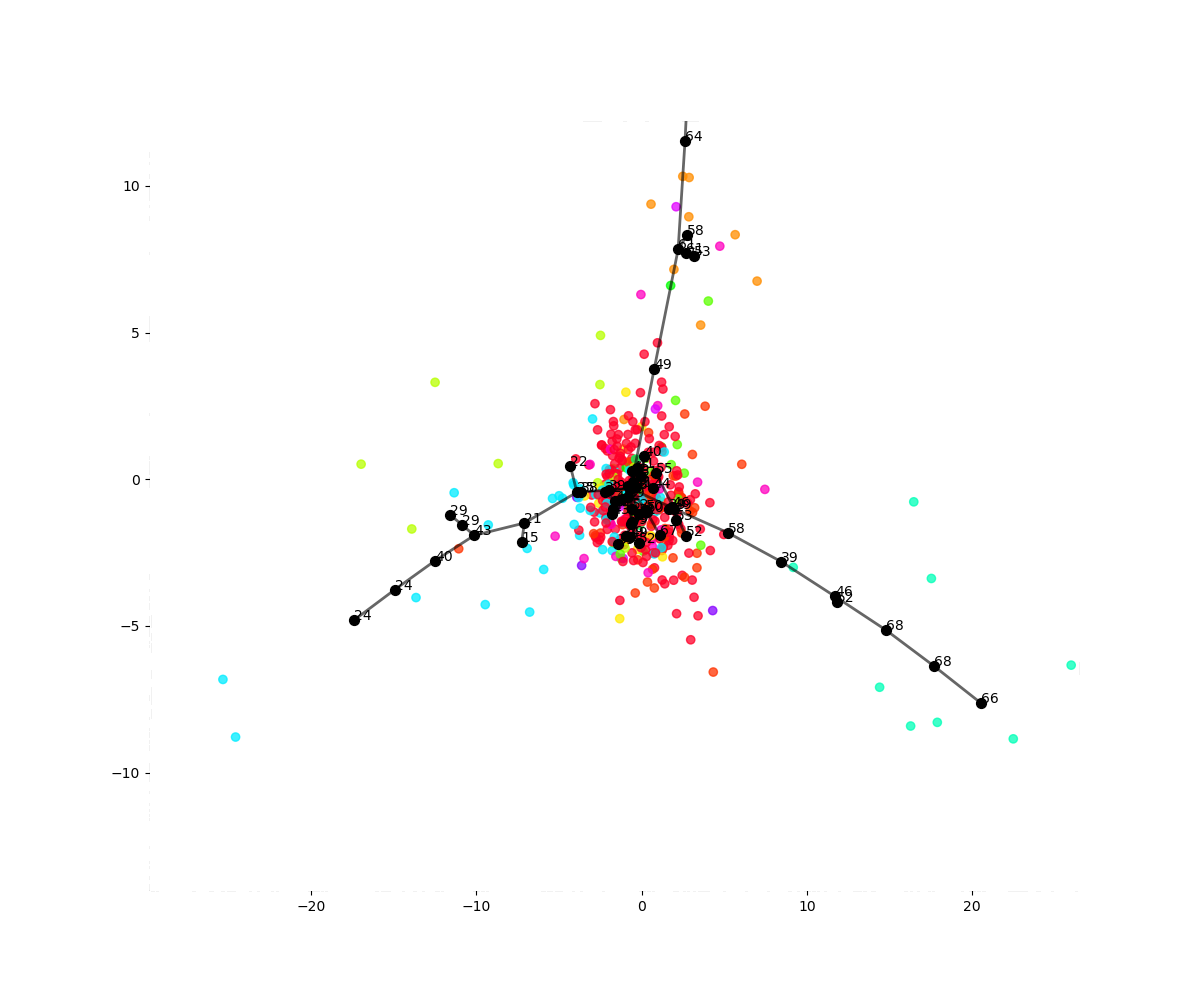

In [22]:
ModifiedPlotPG(X_data_std, tree_60_std, label_data=X_data_0, X_color=y_data, X_alpha = 0.75)